# RBF SVM parameters


This example illustrates the effect of the parameters ``gamma`` and ``C`` of
the Radial Basis Function (RBF) kernel SVM. RBF kernels tend to work better than other kernels on most problems in practice, which is why it's interesting to dig a little deeper into how they work.

Intuitively, the ``gamma`` parameter defines how far the influence of a single
training example reaches, with low values meaning 'far' and high values meaning
'close'.

The ``C`` parameter trades off correct classification of training examples
against maximization of the decision function's margin. For larger values of
``C``, a smaller margin will be accepted if the decision function is better at
classifying all training points correctly. A lower ``C`` will encourage a
larger margin, therefore a simpler decision function, at the cost of training
accuracy. In other words``C`` behaves as a regularization parameter in the
SVM.

This exercise will guide you through visualizing the effect of those two parameters on the way an SVM model classifies data.

1. Import the following libraries :

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

2. Load the iris dataset from ```sklearn``` and create an object X containing the explanatory variables and an object y containing the target variable.

In [4]:
# #############################################################################
# Load and prepare data set
#
# dataset for grid search

iris = load_iris()
X = iris.data
y = iris.target
print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


3. Since this exercise is about visualizing decision boundaries of SVM models and the effect of penalization parameters $C$ and $gamma$, we will simplify the data a little. First keep only the first two columns of X and filter observations so that you only have two different classes for the target variable. This will make it easy to visualize our data, and the predictions of the model.

In [5]:
# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2] # keep first two features
X_2d = X_2d[y > 0] # remove class 0 observations from X
y_2d = y[y > 0] # remove class 0 observations from y
y_2d -= 1 # set values of y from {1,2} to {0,1}

4. Separate the data between a training set and a test set, then normalize the data. Why is it important to scale the data when using SVM models, especially with non-linear kernels?

In [6]:
# It is usually a good idea to scale the data for SVM training.
# Mostly because SVM is usually used with radial kernel which is non linear and thus
# not treating variables in the same way if they are not on the same scale
# Also SVM uses penalization, which depends non-linearly on coefficients, therefore 
# variables should be normalized in order to avoid favouring large scale variables.
Xtrain, Xtest, ytrain, ytest = train_test_split(X_2d, y_2d, test_size = 0.3)
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

5. Create a list C_range containing the values 0.01, 1 , 100 and a list gamma_range that contains the values 0.1, 1 and 10

In [7]:
C_range = [1e-2, 1, 1e2]
gamma_range = [1e-1, 1, 1e1]
print(C_range)
print(gamma_range)

[0.01, 1, 100.0]
[0.1, 1, 10.0]


6. Create an empty list called classifiers, then loop over C_range and gamma_range and train an ```sklearn.svm.SVC``` model on Xtrain and ytrain to form a collection of tuples of the form (value of C, value of gamma, trained svc model) all stored in the list classifiers.

In [8]:
# Now we need to fit a classifier for all parameters

classifiers = []
for C in C_range:
    for gamma in gamma_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(Xtrain, ytrain)
        classifiers.append((C, gamma, clf))

print(classifiers)

[(0.01, 0.1, SVC(C=0.01, gamma=0.1)), (0.01, 1, SVC(C=0.01, gamma=1)), (0.01, 10.0, SVC(C=0.01, gamma=10.0)), (1, 0.1, SVC(C=1, gamma=0.1)), (1, 1, SVC(C=1, gamma=1)), (1, 10.0, SVC(C=1, gamma=10.0)), (100.0, 0.1, SVC(C=100.0, gamma=0.1)), (100.0, 1, SVC(C=100.0, gamma=1)), (100.0, 10.0, SVC(C=100.0, gamma=10.0))]


7. Use the ```np.meshgrid``` function and ```np.linspace``` function in order to create an object xx and an object yy both of shape (200,200) that uniformely map the two dimensional square defined by $(x,y) \forall x\in [-3, 3], y \in [-3, 3]$

In [9]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
print(xx)

[[-3.         -2.93939394 -2.87878788 ...  2.87878788  2.93939394
   3.        ]
 [-3.         -2.93939394 -2.87878788 ...  2.87878788  2.93939394
   3.        ]
 [-3.         -2.93939394 -2.87878788 ...  2.87878788  2.93939394
   3.        ]
 ...
 [-3.         -2.93939394 -2.87878788 ...  2.87878788  2.93939394
   3.        ]
 [-3.         -2.93939394 -2.87878788 ...  2.87878788  2.93939394
   3.        ]
 [-3.         -2.93939394 -2.87878788 ...  2.87878788  2.93939394
   3.        ]]


8. Use the function ```np.c_``` in order to transform xx and yy into a list of coordinates (a list of [x,y]) mapping the space, and store it under the name sample_grid. You will need to transform xx and yy for this to work.

In [10]:
sample_grid = np.c_[xx.ravel(), yy.ravel()]
sample_grid

array([[-3.        , -3.        ],
       [-2.93939394, -3.        ],
       [-2.87878788, -3.        ],
       ...,
       [ 2.87878788,  3.        ],
       [ 2.93939394,  3.        ],
       [ 3.        ,  3.        ]])

9. Apply the method ```.decision_function``` from the seventh element of classifiers to sample_grid, what comes out ? Store this value in an object named Z. Check the decision_function [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function) to learn more.

In [11]:
_,_,classif = classifiers[6]
Z = classif.decision_function(sample_grid)
Z

array([-2.64138948, -2.71304793, -2.78430172, ...,  1.75132884,
        1.65584052,  1.5627223 ])

10. Plot -Z using the ```pcolormesh``` function, xx, yy, and cmap=plt.cm.RdBu

C:\Users\Berenger\AppData\Local\Temp/ipykernel_11564/2812807742.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,-Z.reshape(xx.shape),cmap=plt.cm.RdBu)


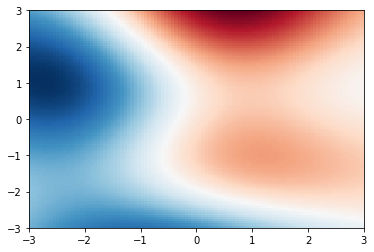

In [12]:
plt.pcolormesh(xx,yy,-Z.reshape(xx.shape),cmap=plt.cm.RdBu)

11. In order to put this in context, add to the same graph the coordinates of your observations with a different color for each category of y, you can use the argument : cmap=plt.cm.RdBu_r

C:\Users\Berenger\AppData\Local\Temp/ipykernel_11564/2810074480.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,-Z.reshape(xx.shape),cmap=plt.cm.RdBu)


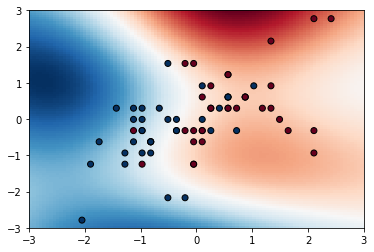

In [13]:
plt.pcolormesh(xx,yy,-Z.reshape(xx.shape),cmap=plt.cm.RdBu)
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, cmap=plt.cm.RdBu_r,
                edgecolors='k')

12. Add another plot that draws the decision boundary of our model.

C:\Users\Berenger\AppData\Local\Temp/ipykernel_11564/2165894482.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,-Z.reshape(xx.shape),cmap=plt.cm.RdBu)


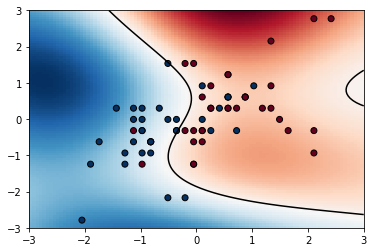

In [14]:
plt.pcolormesh(xx,yy,-Z.reshape(xx.shape),cmap=plt.cm.RdBu)
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, cmap=plt.cm.RdBu_r,
                edgecolors='k')
plt.contour(xx,yy,Z.reshape(xx.shape), levels = [0.0], colors ="black")

12. Loop over ```enumerate(classifiers)``` to produce a similar figure for each of the different classifiers 

C:\Users\Berenger\AppData\Local\Temp/ipykernel_11564/1830324586.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
C:\Users\Berenger\AppData\Local\Temp/ipykernel_11564/1830324586.py:21: UserWarning: No contour levels were found within the data range.
  plt.contour(xx,yy,Z.reshape(xx.shape), levels = [0.0], colors ="black")
C:\Users\Berenger\AppData\Local\Temp/ipykernel_11564/1830324586.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error t

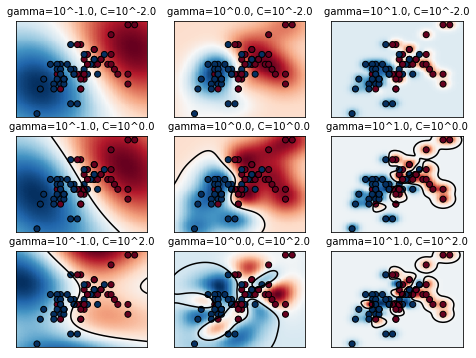

In [15]:
# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(sample_grid)
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_range), len(gamma_range), k + 1)
    plt.title("gamma=10^{0}, C=10^{1}".format(np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.contour(xx,yy,Z.reshape(xx.shape), levels = [0.0], colors ="black")
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

13. Now replace the train sets with the test sets in the loop and look at the results. How do the parameters $C$ and $gamma$ influence the performances of the model ?

C:\Users\Berenger\AppData\Local\Temp/ipykernel_11564/1260978193.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
C:\Users\Berenger\AppData\Local\Temp/ipykernel_11564/1260978193.py:21: UserWarning: No contour levels were found within the data range.
  plt.contour(xx,yy,Z.reshape(xx.shape), levels = [0.0], colors ="black")
C:\Users\Berenger\AppData\Local\Temp/ipykernel_11564/1260978193.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error t

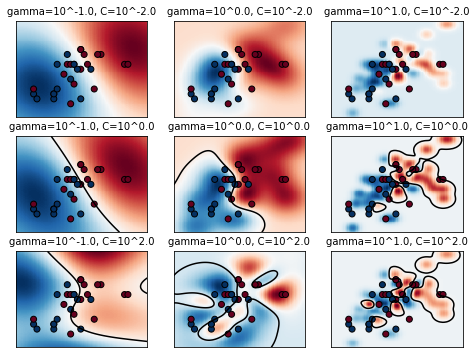

In [16]:
# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(sample_grid)
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_range), len(gamma_range), k + 1)
    plt.title("gamma=10^{0}, C=10^{1}".format(np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.contour(xx,yy,Z.reshape(xx.shape), levels = [0.0], colors ="black")
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

From analysing the graphs, it seems that $gamma$ really drives the way the model will make predicitons that fit closely to the data or not, while $C$ influences how many observations will be misclassified in the train set. A higher $C$ will let fewer points be missclassified, a higher $gamma$ will let the model draw more and more complicated decision boundaries and a steeper decision function.

The behavior of the model is very sensitive to the ``gamma`` parameter. If
``gamma`` is too large, the radius of the area of influence of the support
vectors only includes the support vector itself and no amount of
regularization with ``C`` will be able to prevent overfitting.

When ``gamma`` is very small, the model is too constrained and cannot capture
the complexity or "shape" of the data. The region of influence of any selected
support vector would include the whole training set. The resulting model will
behave similarly to a linear model with a set of hyperplanes that separate the
centers of high density of any pair of two classes.
